In [2]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
#1
Sig_Eqs = pd.read_csv(r'D:\ESE2024\ESE2024\usgs_earthquakes.csv')
Sig_Eqs.info

<bound method DataFrame.info of                            time   latitude   longitude   depth   mag magType  \
0       2014-01-31 23:53:37.000  60.252000 -152.708100   90.20  1.10      ml   
1       2014-01-31 23:48:35.452  37.070300 -115.130900    0.00  1.33      ml   
2       2014-01-31 23:47:24.000  64.671700 -149.252800    7.10  1.30      ml   
3       2014-01-31 23:30:54.000  63.188700 -148.957500   96.50  0.80      ml   
4       2014-01-31 23:30:52.210  32.616833 -115.692500   10.59  1.34      ml   
...                         ...        ...         ...     ...   ...     ...   
120103  2014-12-01 00:10:16.000  60.963900 -146.762900   14.80  3.80      ml   
120104  2014-12-01 00:09:39.000  58.869100 -154.415900  108.40  2.40      ml   
120105  2014-12-01 00:09:25.350  38.843498 -122.825836    2.37  0.43      md   
120106  2014-12-01 00:05:54.000  65.152100 -148.992000    9.50  0.40      ml   
120107  2014-12-01 00:04:05.000  60.227200 -147.024500    2.50  1.60      ml   

       

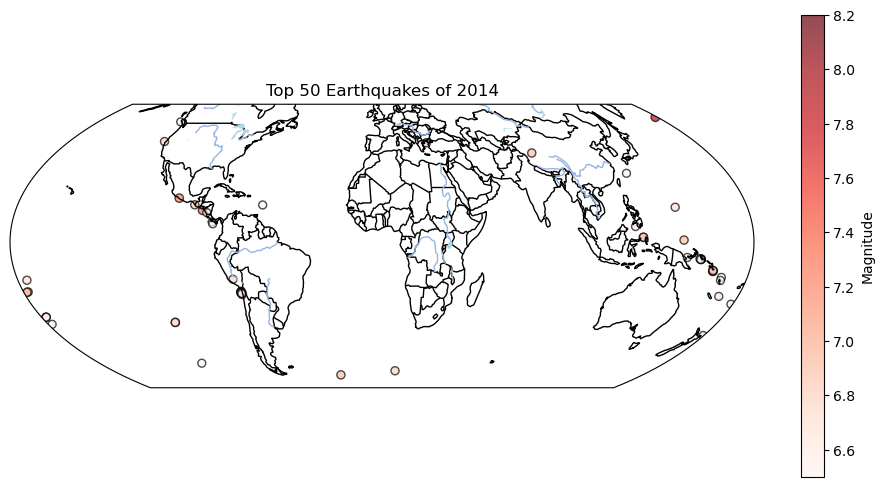

In [4]:
top_earthquakes =  Sig_Eqs.nlargest(50, 'mag')  

# 创建地图，使用不同的投影  
fig = plt.figure(figsize=(12, 6))  
ax = plt.axes(projection=ccrs.Mollweide())  # 使用Mollweide投影  

# 绘制基础地图元素  
ax.add_feature(cfeature.COASTLINE)  
ax.add_feature(cfeature.BORDERS)  
ax.add_feature(cfeature.LAKES, facecolor='lightblue')  
ax.add_feature(cfeature.RIVERS)  

# 根据震级绘制地震点  
scatter = ax.scatter(top_earthquakes['longitude'], top_earthquakes['latitude'],   
                     c=top_earthquakes['mag'], s=top_earthquakes['mag']*5,  
                     cmap='Reds', alpha=0.7, edgecolors='k', transform=ccrs.PlateCarree())  

# 添加颜色条  
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')  
cbar.set_label('Magnitude')  

# 添加标题  
plt.title('Top 50 Earthquakes of 2014')  
plt.show() 

In [5]:
#2
dataset = xr.open_dataset(r"D:\ESE2024\ESE2024\MERRA2_100.tavg1_2d_slv_Nx.19800101.nc4", engine="netcdf4")
dataset

<xarray.Dataset>
Dimensions:   (lon: 576, lat: 361, time: 24)
Coordinates:
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time      (time) datetime64[ns] 1980-01-01T00:30:00 ... 1980-01-01T23:30:00
Data variables: (12/47)
    CLDPRS    (time, lat, lon) float32 ...
    CLDTMP    (time, lat, lon) float32 ...
    DISPH     (time, lat, lon) float32 ...
    H1000     (time, lat, lon) float32 ...
    H250      (time, lat, lon) float32 ...
    H500      (time, lat, lon) float32 ...
    ...        ...
    V250      (time, lat, lon) float32 ...
    V2M       (time, lat, lon) float32 ...
    V500      (time, lat, lon) float32 ...
    V50M      (time, lat, lon) float32 ...
    V850      (time, lat, lon) float32 ...
    ZLCL      (time, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original file generated: Sat May 31 17...
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Filename:                          MERRA2_100.tavg1_2d_slv_Nx.19800101.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/VJAFPLI1CSIV
    RangeBeginningDate:                1980-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   1980-01-01
    RangeEndingTime:                   23:59:59.000000

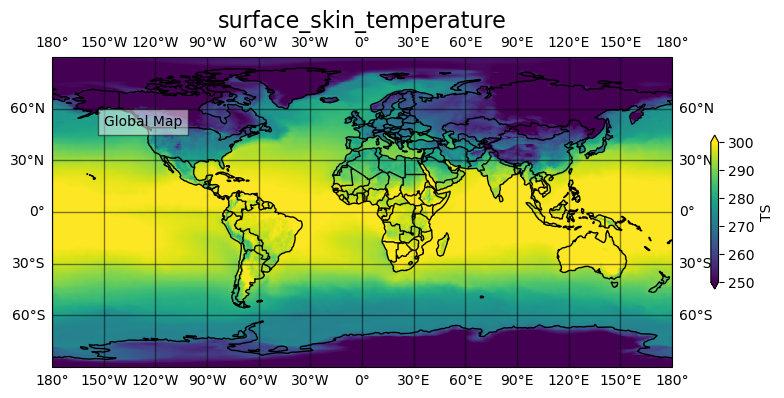

In [24]:
#2.1 
variable_name = 'TS'  
data = dataset[variable_name]  

# 创建全球地图  
plt.figure(figsize=(10, 5), dpi=100)  
proj = ccrs.PlateCarree()  # 使用等经纬度投影  

# 创建坐标轴  
ax = plt.axes(projection=proj)  

# 绘制数据，取时间维度的平均值  
data.mean(dim='time').plot(ax=ax, transform=proj,  
                           vmin=250, vmax=300,   
                           cbar_kwargs={'shrink': 0.4})  

# 添加国家边界  
ax.add_feature(cfeature.BORDERS)  
ax.add_feature(cfeature.COASTLINE)  

# 添加网格线  
gl = ax.gridlines(draw_labels=True, linewidth=1, color='black', alpha=0.5)  
gl.xlocator = plt.MultipleLocator(30)  # 经度间隔30°  
gl.ylocator = plt.MultipleLocator(30)  # 纬度间隔30°  

# 设置标题和标签  
ax.set_title('surface_skin_temperature', fontsize=16)  
ax.set_xlabel('Longitude', fontsize=12)  
ax.set_ylabel('Latitude', fontsize=12)  

# 添加文本框  
plt.text(-150, 50, 'Global Map', bbox=dict(facecolor='white', alpha=0.5))  

plt.show()

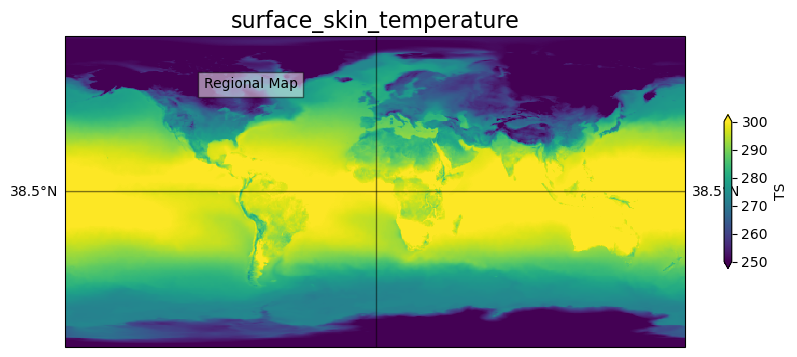

In [30]:
#2.2
variable_name = 'TS'  
data = dataset[variable_name]  

plt.figure(figsize=(10, 5), dpi=100)  
proj = ccrs.LambertConformal(central_longitude=115, central_latitude=38.5)  

# 创建坐标轴  
ax = plt.axes(projection=proj)  

# 绘制数据，取时间维度的平均值  
data.mean(dim='time').plot(ax=ax, transform=proj,  
                           vmin=250, vmax=300,   
                           cbar_kwargs={'shrink': 0.4})  

# 添加国家边界  
ax.add_feature(cfeature.BORDERS)  
ax.add_feature(cfeature.COASTLINE)  

# 添加网格线  
gl = ax.gridlines(draw_labels=True, linewidth=1, color='black', alpha=0.5)  
gl.xlocator = plt.MultipleLocator(0.1)  # 经度间隔10°  
gl.ylocator = plt.MultipleLocator(0.1)  # 纬度间隔10°  

# 设置标题和标签  
ax.set_title('surface_skin_temperature', fontsize=16)  
ax.set_xlabel('Longitude', fontsize=12)  
ax.set_ylabel('Latitude', fontsize=12)  

# 添加文本框  
plt.text(-100, 60, 'Regional Map', bbox=dict(facecolor='white', alpha=0.5))  

plt.show() 